<a href="https://colab.research.google.com/github/PAVAN143258/YBI_PROJECTS/blob/main/Project_4_fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_fake = pd.read_csv("/content/drive/MyDrive/NLP/FakeNews.csv")
df_true= pd.read_csv("/content/drive/MyDrive/NLP/TrueNews.csv")
df_fake.columns, df_true.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake["label"] = "fake"
df_true["label"] = "true"
df_fake.columns, df_true.columns

(Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'))

In [7]:
df = pd.concat([df_fake,df_true], axis = 0)
df = df.sample(frac=1).reset_index(drop=True)

In [8]:
df.dtypes

title      object
text       object
subject    object
date       object
label      object
dtype: object

In [9]:
pat = r'((?:\d{,2}\s)?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*(?:-|\.|\s|,)\s?\d{,2}[a-z]*(?:-|,|\s)?\s?\d{2,4})'

s = df['date'].str.extract(pat, expand=False)
df['date_new']  = pd.to_datetime(s, errors = 'coerce')
#Could not convert date for df_fake due to prescence of unformated data, hence created a new column for it

In [10]:
df.sort_values(by =["date_new"], ascending = False, inplace = True)
df

,title,text,subject,date,label,date_new
38273,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,2017-12-31
21532,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,Middle-east,"December 31, 2017",fake,2017-12-31
13769,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,2017-12-31
9626,COORDINATED? Yet Another Hack Reporter Claims ...,A coordinated effort to spew anti-Trump propag...,politics,"Dec 31, 2017",fake,2017-12-31
15524,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,left-news,"Dec 31, 2017",fake,2017-12-31
...,...,...,...,...,...,...
38117,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,fake,NaT
40065,MEGHAN MCCAIN Cut-Off After Saying the Florida...,It clear that common sense isn t what these he...,politics,17-Feb-18,fake,NaT
41311,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,fake,NaT
41368,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,fake,NaT


In [11]:
df.dtypes

title               object
text                object
subject             object
date                object
label               object
date_new    datetime64[ns]
dtype: object

In [12]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
label        0
date_new    45
dtype: int64

In [13]:
df.dropna(subset=["date_new"], inplace = True)

In [14]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
label       0
date_new    0
dtype: int64

In [15]:
df.dtypes

title               object
text                object
subject             object
date                object
label               object
date_new    datetime64[ns]
dtype: object

In [16]:
df_new = df.copy()
df_new = df.drop("date", axis = 1)
df_new.columns

Index(['title', 'text', 'subject', 'label', 'date_new'], dtype='object')

In [17]:
df_new["year"] = df_new.date_new.dt.year
df_new["month"] = df_new.date_new.dt.month
df_new.drop("date_new", axis = 1, inplace = True)

In [18]:
df_new.head()

,title,text,subject,label,year,month
38273,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,true,2017,12
21532,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,Middle-east,fake,2017,12
13769,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,true,2017,12
9626,COORDINATED? Yet Another Hack Reporter Claims ...,A coordinated effort to spew anti-Trump propag...,politics,fake,2017,12
15524,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,left-news,fake,2017,12


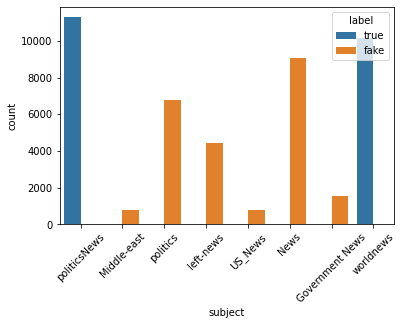

In [19]:
sns.countplot(x='subject', hue='label', data=df_new)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

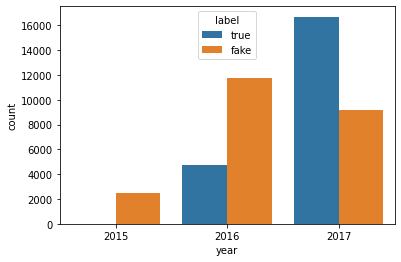

In [20]:
sns.countplot(x='year', hue='label', data=df_new);

In [21]:
#dropping the subject column as it does not seem to give much insight

df_new.drop("subject", axis = 1, inplace = True)
df_new.columns

Index(['title', 'text', 'label', 'year', 'month'], dtype='object')

In [22]:
#Splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_predict


X = df_new["text"]
y = df_new["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31397,), (13456,), (31397,), (13456,))

In [23]:
#feature extraction and transformation to remove stop words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer(stop_words="english", max_df = 0.7)

t_train = tfidv.fit_transform(X_train)
t_test = tfidv.transform(X_test)


In [24]:
#initializing, fitting and training model

from sklearn.linear_model import PassiveAggressiveClassifier

paclf = PassiveAggressiveClassifier(max_iter = 100)
paclf.fit(t_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

In [25]:
#predicting with the model

y_preds = paclf.predict(t_test)

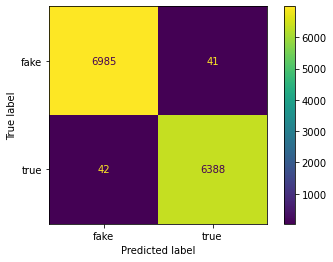

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


conf_mat = confusion_matrix(y_test, y_preds, labels = paclf.classes_ )
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=paclf.classes_)
display.plot()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_preds (y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, pos_label = "true")
    recall = recall_score (y_test, y_preds, pos_label = "true")
    f1 = f1_score (y_test, y_preds, pos_label = "true")

    metric_dict = {
                    "accuracy": round(accuracy, 2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)
                    }

    print(f"Accuracy: {accuracy*100:.2f}%")
    print (f"Precision: {precision:.2f}")
    print (f"Recall: {recall:.2f}")
    print (f"F1: {f1:.2f}")

    return metric_dict

evaluate_preds(y_test, y_preds)

Accuracy: 99.38%
Precision: 0.99
Recall: 0.99
F1: 0.99


{'accuracy': 0.99, 'precision': 0.99, 'recall': 0.99, 'f1': 0.99}